C:\Users\madsh\AppData\Local\Temp\ipykernel_1708\3418227064.py:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


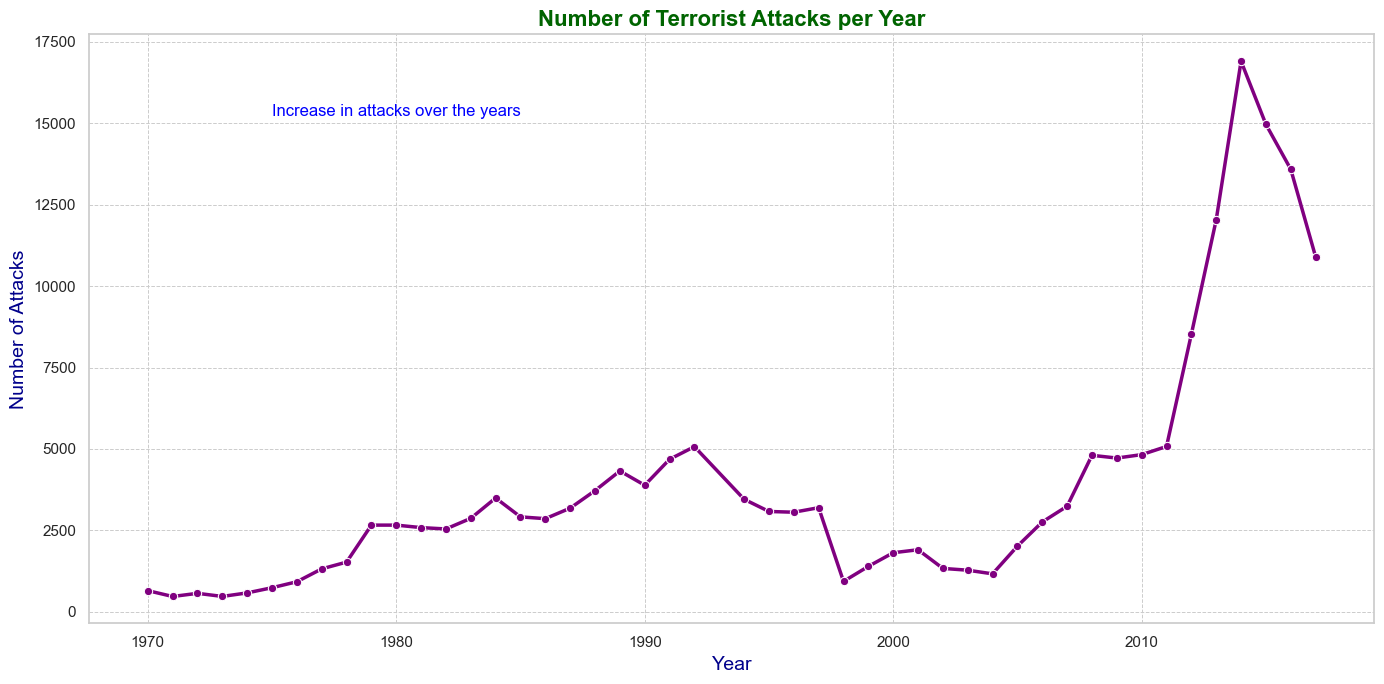

C:\Users\madsh\AppData\Local\Temp\ipykernel_1708\3418227064.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_deaths.index, y=total_deaths.values, palette='coolwarm')
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(p

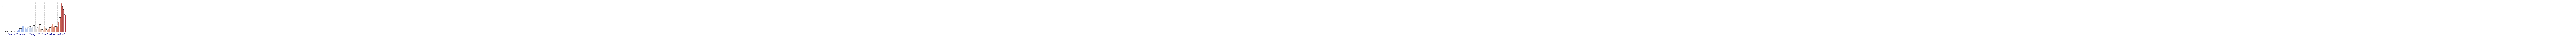

C:\Users\madsh\AppData\Local\Temp\ipykernel_1708\3418227064.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_grou

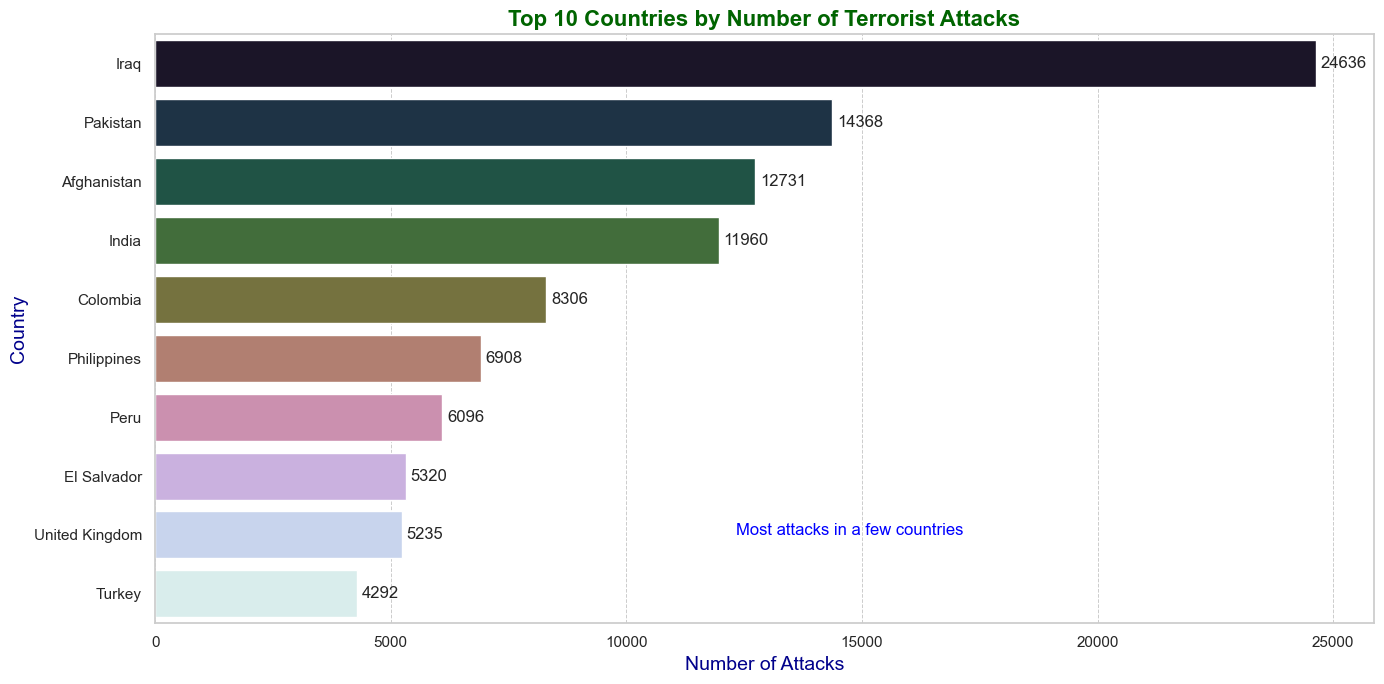

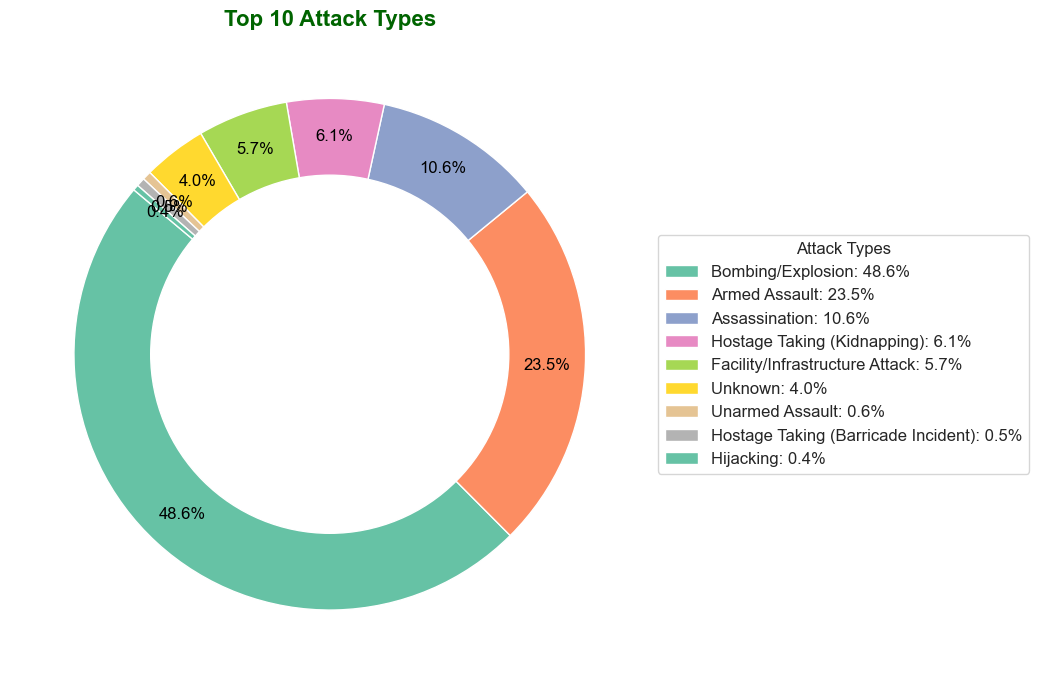

C:\Users\madsh\AppData\Local\Temp\ipykernel_1708\3418227064.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_deaths.index, y=total_deaths.values, palette='coolwarm', ax=axes[0, 1])
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\madsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

# Data Processing
# Focus on relevant columns for analysis
df = df[['iyear', 'country_txt', 'attacktype1_txt', 'nkill']]

# Handle missing values
df.fillna({'nkill': 0}, inplace=True)

# Summary statistics
total_attacks = df['iyear'].value_counts().sort_index()
total_deaths = df.groupby('iyear')['nkill'].sum()

# Aggregating data for other plots
top_countries = df['country_txt'].value_counts().head(10)
attack_types = df['attacktype1_txt'].value_counts().head(10)

# Set style
sns.set(style="whitegrid")

# Define a color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Plot 1: Number of Attacks per Year (Line Plot)
plt.figure(figsize=(14, 7))
sns.lineplot(x=total_attacks.index, y=total_attacks.values, marker='o', linewidth=2.5, color='purple')
plt.title("Number of Terrorist Attacks per Year", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Year", fontsize=14, color='darkblue')
plt.ylabel("Number of Attacks", fontsize=14, color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.text(1975, max(total_attacks.values)*0.9, "Increase in attacks over the years", fontsize=12, color='blue')
plt.tight_layout()
plt.show()

# Plot 2: Number of Deaths per Year (Bar Plot)
plt.figure(figsize=(14, 7))
sns.barplot(x=total_deaths.index, y=total_deaths.values, palette='coolwarm')
for i, value in enumerate(total_deaths.values):
    plt.text(i, value + 50, f'{value:.0f}', ha='center', va='bottom')
plt.title("Number of Deaths due to Terrorist Attacks per Year", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Year", fontsize=14, color='darkblue')
plt.ylabel("Number of Deaths", fontsize=14, color='darkblue')
plt.xticks(rotation=45, color='darkblue')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.text(1975, max(total_deaths.values)*0.9, "High fatalities in peak years", fontsize=12, color='red')
plt.tight_layout()
plt.show()

# Plot 3: Top 10 Countries by Number of Attacks (Horizontal Bar Plot)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
for i, value in enumerate(top_countries.values):
    plt.text(value + 100, i, f'{value:.0f}', ha='left', va='center')
plt.title("Top 10 Countries by Number of Terrorist Attacks", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Number of Attacks", fontsize=14, color='darkblue')
plt.ylabel("Country", fontsize=14, color='darkblue')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
plt.text(max(top_countries.values)*0.5, 8, "Most attacks in a few countries", fontsize=12, color='blue')
plt.tight_layout()
plt.show()

# Plot 4: Top 10 Attack Types (Pie Chart with Percentage in Legend)
plt.figure(figsize=(14, 7))
colors = plt.get_cmap('Set2').colors

# Create the pie chart
wedges, texts, autotexts = plt.pie(
    attack_types.values,
    colors=colors,
    startangle=140,
    autopct='%1.1f%%',
    pctdistance=0.85,  # Adjust the position of the percentage labels
    textprops=dict(color="black", fontsize=12)
)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create legend labels with percentages
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(attack_types.index, (attack_types.values / attack_types.sum()) * 100)]
plt.legend(
    wedges,
    legend_labels,
    title="Attack Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

# Add title
plt.title("Top 10 Attack Types", fontsize=16, fontweight='bold', color='darkgreen')

# Improve layout
plt.tight_layout()
plt.show()

# Compile the infographic
fig, axes = plt.subplots(2, 2, figsize=(22, 20))

# Subplot 1
sns.lineplot(x=total_attacks.index, y=total_attacks.values, marker='o', linewidth=2.5, color='purple', ax=axes[0, 0])
axes[0, 0].set_title("Number of Terrorist Attacks per Year", fontsize=16, fontweight='bold', color='darkgreen')
axes[0, 0].set_xlabel("Year", fontsize=14, color='darkblue')
axes[0, 0].set_ylabel("Number of Attacks", fontsize=14, color='darkblue')
axes[0, 0].grid(True, linestyle='--', linewidth=0.7)
axes[0, 0].text(1975, max(total_attacks.values)*0.9, "Increase in attacks over the years", fontsize=12, color='blue')

# Subplot 2
sns.barplot(x=total_deaths.index, y=total_deaths.values, palette='coolwarm', ax=axes[0, 1])
for i, value in enumerate(total_deaths.values):
    axes[0, 1].text(i, value + 50, f'{value:.0f}', ha='center', va='bottom')
axes[0, 1].set_title("Number of Deaths due to Terrorist Attacks per Year", fontsize=16, fontweight='bold', color='darkred')
axes[0, 1].set_xlabel("Year", fontsize=14, color='darkblue')
axes[0, 1].set_ylabel("Number of Deaths", fontsize=14, color='darkblue')
axes[0, 1].tick_params(axis='x', rotation=45, labelcolor='darkblue')
axes[0, 1].grid(True, linestyle='--', linewidth=0.7)
axes[0, 1].text(1975, max(total_deaths.values)*0.9, "High fatalities in peak years", fontsize=12, color='red')

# Subplot 3
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix', ax=axes[1, 0])
for i, value in enumerate(top_countries.values):
    axes[1, 0].text(value + 100, i, f'{value:.0f}', ha='left', va='center')
axes[1, 0].set_title("Top 10 Countries by Number of Terrorist Attacks", fontsize=16, fontweight='bold', color='darkgreen')
axes[1, 0].set_xlabel("Number of Attacks", fontsize=14, color='darkblue')
axes[1, 0].set_ylabel("Country", fontsize=14, color='darkblue')
axes[1, 0].grid(True, axis='x', linestyle='--', linewidth=0.7)
axes[1, 0].text(max(top_countries.values)*0.5, 8, "Most attacks in a few countries", fontsize=12, color='blue')

# Subplot 4
# Create the pie chart on the specified subplot
wedges, texts, autotexts = axes[1, 1].pie(
    attack_types.values,
    colors=colors,
    startangle=140,
    autopct='%1.1f%%',
    pctdistance=0.85,  # Adjust the position of the percentage labels
    textprops=dict(color="black", fontsize=12)
)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1, 1].add_artist(centre_circle)

# Adjust percentage labels to be placed outside the pie
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    x, y = autotext.get_position()
    autotext.set_position((x*1.4, y*1.4))  # Further move the labels outward

# Create legend labels with percentages
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(attack_types.index, (attack_types.values / attack_types.sum()) * 100)]
axes[1, 1].legend(
    wedges,
    legend_labels,
    title="Attack Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

# Add title
axes[1, 1].set_title("Top 10 Attack Types", fontsize=16, fontweight='bold', color='darkgreen')

fig.suptitle("Global Terrorism Analysis\nKhadiza Mahdin, Student ID: 22055871", fontsize=18, fontweight='bold')

# Add the given information in a box
info_text = (
    "The dashboard analyzes the status of terrorism around the world from 1970 through 2017.\n\n"
    "Plot 1 shows us clearly that starting from 2011 the number of terrorist attacks experienced rapid upturn peaking at 2014 "
    "(about 17000 incidents) with a declining trend from the year next.\n\n"
    "Plot 2 implies that at the same year of 2014 the casualties due to the terrorist attacks were the highest which crosses 40000.\n\n"
    "Plot 3 shows Afghanistan, Pakistan, and Iraq withstand the highest number of terrorist attacks while Iraq tops with number of more than 24000 cases.\n\n"
    "Plot 4 shows the highest number (48.6%) of the terrorist attacks were executed with Bombing while about a quarter of the attacks caused by armed men.\n\n"
    "In summary, we can say that Iraq endured the highest number of death by terrorists where bombs were the primary weapon of destruction and the peak year for terrorist attack was 2014."
)

# Create a text box
props = dict(boxstyle='round,pad=1', facecolor='lightyellow', edgecolor='black')
plt.figtext(0.5, 0.02, info_text, wrap=True, horizontalalignment='center', fontsize=12, bbox=props)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()




In [5]:
! python --version

Python 3.9.7
